## Webscraping: The Basics!

Keep in mind: When possible, it's preferrable to use an API of the website you're trying to get information from. What's an API?

https://www.youtube.com/watch?v=s7wmiS2mSXY

It's better to use an API than to visit a website with a bot / webscrape. Why? 

1.) Because with an API you're now working _with_ the information provider, and allowing them to decide how to provide that information to you. 

2.) Downloading everything on their website over-and-over again can cause their website to fail, and they might even block you. 

3.) If the structure of their website changes, they'll update the API and you won't have to update your own code. You might understand this argument a bit better when I show you how webscraping works,

In [6]:
import bs4  # python package for webscraping
import re   # regular expressions, in case we need to do some pattern finding
import requests   # Getting data from a URL
import webbrowser as wb # Just so you can open something up in your webbrowser straight from this notebook ;) 

In [2]:
URL = "http://www.gutenberg.org/ebooks/100" # The complete works of Shakespeare

In [3]:
wb.open(URL)

True

So we have decided to webscrape. In order to webscrape, we must understand just a little bit about HTML

## What is HTML?

HTML is a markup langauge. That means that it makes text look fancy in different ways. It is **_not_** a programming language, as it lacks key features. 


Think of using HTML just like being able to write a docx file directly. You can make text italic with:

    <i>italic text here</i>
    
bold:

    <b>bold text here</b>
    
headers

    <h1>header right here</h1>
    
**Don't worry about learning HTML right now**. The key of this explainer is just understanding some basic structure of HTML.

Have a look at some example HTML below

### HTML Sample

    <body>
    <div id="listings_prices">
     <div class="item">
      <li class="item_name">Watch</li>
      <div class="main_price">Price: $66.68</div>
           <div class="discounted_price">Discounted price: $46.68</div>
       <div class="item"></div>
      <li class="item_name">Watch2</li>
      <div class="main_price">Price: $56.68</div>
       </div>
    </div>
    </body>

Imagine trying to restructure the HTML so that it's easily accessible in Python. Let's look at how it's structured.


It begins with the ```<body>``` tag, and ends with the ```</body>``` tag.

Note that if we remove the ```body``` tags, we can see the structure of the remainer more clearly

### HTML sample with outside tags removed


```<div id="listings_prices">```

         <div class="item">
          <li class="item_name">Watch</li>
          <div class="main_price">Price: $66.68</div>
               <div class="discounted_price">Discounted price: $46.68</div>
           <div class="item"></div>
          <li class="item_name">Watch2</li>
          <div class="main_price">Price: $56.68</div>
           </div>
           
           
```</div>```

Now to better understand the rest of the body, let's remove the ```<div>``` tags on the outside as well.

### HTML sample with outside tags removed twice


```<div class="item">```
       
       
          <li class="item_name">Watch</li>
          <div class="main_price">Price: $66.68</div>
               <div class="discounted_price">Discounted price: $46.68</div>
           <div class="item"></div>
          <li class="item_name">Watch2</li>
          <div class="main_price">Price: $56.68</div>
          
          
```</div>```


We can remove the outside ```<div>``` tags once again.

### HTML sample with outside tags removed three times




          <li class="item_name">Watch</li>
          <div class="main_price">Price: $66.68</div>
               <div class="discounted_price">Discounted price: $46.68</div>
              
           <div class="item"></div>
          <li class="item_name">Watch2</li>
          <div class="main_price">Price: $56.68</div>


Now on the inside, there are many tags at the same level. We have:
    
    <li>
    <div>
    <div>
    <div>
    <li>
    <div>

So you can imagine making a tree, or some indented diagram to represent the structure of the HTML we chopped up above.

    <body>
        <div>
            <div>
                <li>
                <div>
                <div>
                <li>
                <div>

And we can access each of the above parts using dot notation. Say we want to access the contents of the ```body``` above:

    HTMLObject.body

Or say we want to access the contents of ```div``` above, we simply type:

    HTMLObject.body.div

Or say we want to access ```li``` above:
    
    HTMLObject.body.div.div.li

### BeautifulSoup (bs4) allows us to do this. 

Usually we call the ```HTMLObject``` under the variable name ```soup```, with the following syntax:

    soup = bs4.BeautifulSoup(HTMLstring)

In [29]:
input_text = """
<body>
<div id="listings_prices">
 <div class="item">
  <li class="item_name">Watch</li>
  <div class="main_price">Price: $66.68</div>
       <div class="discounted_price">Discounted price: $46.68</div>
   </div>
   <div class="item">
  <li class="item_name">Watch2</li>
  <div class="main_price">Price: $56.68</div>
   </div>
</div>
</body>"""

In [30]:
soup = bs4.BeautifulSoup(input_text)

/Applications/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Applications/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


### It's all soup!

Above we have converted the ```str``` input_text into a ```bs4.BeautifulSoup``` type.

In [59]:
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [31]:
soup.body

<body>
<div id="listings_prices">
<div class="item">
<li class="item_name">Watch</li>
<div class="main_price">Price: $66.68</div>
<div class="discounted_price">Discounted price: $46.68</div>
</div>
<div class="item">
<li class="item_name">Watch2</li>
<div class="main_price">Price: $56.68</div>
</div>
</div>
</body>

Notice that ```soup.body.div``` is also a new type called ```bs4.element.Tag```. I wouldn't worry too much about memorizing these new types we're encountering. 


Just Be aware that although it may look like a ```str``` it is not a string, and therefore we cannot use string methods such as 

```str.split()```

In [61]:
type(soup.body.div)

bs4.element.Tag

In [64]:
print(soup.body.div) 

soup.body.div.split() # this will return an error

<div id="listings_prices">
<div class="item">
<li class="item_name">Watch</li>
<div class="main_price">Price: $66.68</div>
<div class="discounted_price">Discounted price: $46.68</div>
</div>
<div class="item">
<li class="item_name">Watch2</li>
<div class="main_price">Price: $56.68</div>
</div>
</div>


TypeError: 'NoneType' object is not callable

And we can keep accessing parts of the data

In [32]:
soup.body.div

<div id="listings_prices">
<div class="item">
<li class="item_name">Watch</li>
<div class="main_price">Price: $66.68</div>
<div class="discounted_price">Discounted price: $46.68</div>
</div>
<div class="item">
<li class="item_name">Watch2</li>
<div class="main_price">Price: $56.68</div>
</div>
</div>

In [33]:
soup.body.div.div

<div class="item">
<li class="item_name">Watch</li>
<div class="main_price">Price: $66.68</div>
<div class="discounted_price">Discounted price: $46.68</div>
</div>

In [34]:
soup.body.div.div.li

<li class="item_name">Watch</li>

You'll also notice that tags are described by their "class." For instnace, the ```<li>``` tags have the "item_name" tag in it.

We can use the ```soup.contents``` attribute to see what's inside!

### soup.contents

In [53]:
soup.body.div.div.li.contents

['Watch']

In [54]:
type(soup.body.div.div.li.contents)

list

And like any list, you can index it to see what's inside

In [67]:
soup.body.div.contents

['\n', <div class="item">
 <li class="item_name">Watch</li>
 <div class="main_price">Price: $66.68</div>
 <div class="discounted_price">Discounted price: $46.68</div>
 </div>, '\n', <div class="item">
 <li class="item_name">Watch2</li>
 <div class="main_price">Price: $56.68</div>
 </div>, '\n']

In [6]:
soup.body

<body>
<div id="listings_prices">
<div class="item">
<li class="item_name">Watch</li>
<div class="main_price">Price: $66.68</div>
<div class="discounted_price">Discounted price: $46.68</div>
</div>
<div class="item">
<li class="item_name">Watch2</li>
<div class="main_price">Price: $56.68</div>
</div>
</div>
</body>

### Soup.find_all()

We can also use the ```soup.findall``` method to find all instnaces of a certain tag. It's much easier to understand through example, than by description:



In [9]:
soup.find_all(class_='main_price')

[<div class="main_price">Price: $66.68</div>,
 <div class="main_price">Price: $56.68</div>]

In [72]:
soup.find_all('li')

[<li class="item_name">Watch</li>, <li class="item_name">Watch2</li>]

What's for sale? Let's find out!

In [71]:
for tag in soup.find_all('li'):
    print(tag.contents[0])

Watch
Watch2


# Webscraping Exercise 1

We're going to webscrape some real data and it's going to be ***very*** hard.

Every company listed on the stock market has an associated "ticker symbol."

Here are some examples:

    Microsoft : MSFT
    Facebook : FB
    Apple : AAPL
    
Run the code below and try to find the ticker symbols there:

In [1]:
import webbrowser as wb

stockpup = "http://www.stockpup.com/data/"
wb.open(stockpup)

True

Let's retreive the HTML behind the website as a python string, using ```requests.get(URLname)```



In [2]:
import requests

text = requests.get(stockpup).text

And let's try to find the ticker symbols. Beware. It will be REALLY messy.

In [3]:
text

'<!DOCTYPE html>\n<html>\n<head>\n  <meta charset="utf-8">\n  <meta http-equiv="X-UA-Compatible" content="IE=edge">\n  <meta name="viewport" content="width=device-width, initial-scale=1">\n  <title>Download long-term fundamental data in excel</title>\n  <meta name="Description" content="StockPup provides over 20 years of quarterly \nfundamental financial data from SEC filings by public companies. All data \nis available for download in Excel." />\n  <link rel="stylesheet" href="/static/css/bootstrap.min.css">\n  <link rel="stylesheet" href="/static/css/style.css" />\n  <link rel="apple-touch-icon" href="/static/img/stockpup_iphone.png" />\n  <script src="//ajax.googleapis.com/ajax/libs/jquery/1.11.0/jquery.min.js"></script>\n  \n  <script type="text/javascript" src="/static/js/scripts.js"></script>\n  <meta name="msvalidate.01" content="352272921552F4679186D73347724B05" />\n  <meta property="fb:admins" content="858220701" />\n  <meta name="google-site-verification" content="5e3s65wUB5G

Here's some of what I see:

    <a href="/data/AMT_quarterly_financial_data.xls"\n            title="fundamental_data_excel_AMT.xls">XLS</a>,\n            <a href="/data/AMT_quarterly_financial_data.csv"\n            title="fundamental_data_excel_AMT.csv">CSV</a>\n            </p>\n            \n            <p><b>AMZN</b> - Amazon.com, Inc.: \n            <a href="/data/AMZN_quarterly_financial_data.xls"\n            title="fundamental_data_excel_AMZN.xls">XLS</a>,\n            <a href="/data/AMZN_quarterly_financial_data.csv"\n            title="fundamental_data_excel_AMZN.csv">CSV</a>\n            </p>\n            \n            <p><b>AN</b> - AutoNation, Inc.: \n            <a href="/data/AN_quarterly_financial_data.xls"\n            title="fundamental_data_excel_AN.xls">XLS</a>

We see Amazon's ticker symbol, ```AMZN``` above. We see it's immeadiately surrounded by the ```<b></b>``` tag. We also see that the ```<b>``` tag has a ```<p>``` tag right in front of it.


Let's get started making our soup!

In [7]:
soup = bs4.BeautifulSoup(text)

/Applications/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Applications/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


***Try to build a list of strings containing all ticker symbols in stockpup!***


Unfortunately, the best we can do is to try things until it seems to work... [See the solutions if you're getting stuck here...]

In [8]:
soup.find_all('b')

[<b>A</b>,
 <b>AAL</b>,
 <b>AAN</b>,
 <b>AAP</b>,
 <b>AAPL</b>,
 <b>ABBV</b>,
 <b>ABC</b>,
 <b>ABI</b>,
 <b>ABMD</b>,
 <b>ABT</b>,
 <b>ACAS</b>,
 <b>ACC</b>,
 <b>ACIW</b>,
 <b>ACM</b>,
 <b>ACN</b>,
 <b>ACS</b>,
 <b>ACV</b>,
 <b>ACXM</b>,
 <b>ADBE</b>,
 <b>ADCT</b>,
 <b>ADI</b>,
 <b>ADM</b>,
 <b>ADP</b>,
 <b>ADS</b>,
 <b>ADSK</b>,
 <b>ADT</b>,
 <b>AEE</b>,
 <b>AEO</b>,
 <b>AEP</b>,
 <b>AES</b>,
 <b>AET</b>,
 <b>AFG</b>,
 <b>AFL</b>,
 <b>AGCO</b>,
 <b>AGN</b>,
 <b>AGN</b>,
 <b>AHL</b>,
 <b>AIG</b>,
 <b>AIV</b>,
 <b>AIZ</b>,
 <b>AJG</b>,
 <b>AKAM</b>,
 <b>AKRX</b>,
 <b>ALB</b>,
 <b>ALEX</b>,
 <b>ALGN</b>,
 <b>ALK</b>,
 <b>ALL</b>,
 <b>ALLE</b>,
 <b>ALTR</b>,
 <b>ALXN</b>,
 <b>AMAT</b>,
 <b>AMBC</b>,
 <b>AMCX</b>,
 <b>AMD</b>,
 <b>AME</b>,
 <b>AMG</b>,
 <b>AMGN</b>,
 <b>AMP</b>,
 <b>AMSC</b>,
 <b>AMT</b>,
 <b>AMZN</b>,
 <b>AN</b>,
 <b>ANDV</b>,
 <b>ANDW</b>,
 <b>ANF</b>,
 <b>ANR</b>,
 <b>ANSS</b>,
 <b>ANTM</b>,
 <b>AON</b>,
 <b>AOS</b>,
 <b>APA</b>,
 <b>APC</b>,
 <b>APD</b>,
 <b>APH</b>,
 

In [12]:
tickerList = []

for result in soup.find_all('b'):
    ticker = str(result)[3:-4]
    tickerList.append(ticker)
    
tickerList

['A',
 'AAL',
 'AAN',
 'AAP',
 'AAPL',
 'ABBV',
 'ABC',
 'ABI',
 'ABMD',
 'ABT',
 'ACAS',
 'ACC',
 'ACIW',
 'ACM',
 'ACN',
 'ACS',
 'ACV',
 'ACXM',
 'ADBE',
 'ADCT',
 'ADI',
 'ADM',
 'ADP',
 'ADS',
 'ADSK',
 'ADT',
 'AEE',
 'AEO',
 'AEP',
 'AES',
 'AET',
 'AFG',
 'AFL',
 'AGCO',
 'AGN',
 'AGN',
 'AHL',
 'AIG',
 'AIV',
 'AIZ',
 'AJG',
 'AKAM',
 'AKRX',
 'ALB',
 'ALEX',
 'ALGN',
 'ALK',
 'ALL',
 'ALLE',
 'ALTR',
 'ALXN',
 'AMAT',
 'AMBC',
 'AMCX',
 'AMD',
 'AME',
 'AMG',
 'AMGN',
 'AMP',
 'AMSC',
 'AMT',
 'AMZN',
 'AN',
 'ANDV',
 'ANDW',
 'ANF',
 'ANR',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'APC',
 'APD',
 'APH',
 'APOL',
 'APU',
 'ARE',
 'ARG',
 'ARNC',
 'ARRS',
 'ARW',
 'ASH',
 'ATGE',
 'ATI',
 'ATVI',
 'AVB',
 'AVGO',
 'AVP',
 'AVY',
 'AW',
 'AWK',
 'AXP',
 'AYE',
 'AYI',
 'AZO',
 'BA',
 'BAC',
 'BAX',
 'BBBY',
 'BBT',
 'BBY',
 'BC',
 'BCR',
 'BDK',
 'BDX',
 'BEAM',
 'BEN',
 'BF.A',
 'BHF',
 'BHI',
 'BIG',
 'BIIB',
 'BJS',
 'BK',
 'BKE',
 'BKNG',
 'BLK',
 'BLL',
 'BMC',
 'BMS',
 

# Webscraping Exercise 2


Have another look at the sample below. There also appear to be links ```href = ```. Let's try seeing what's at the link

Here's some of what I see:

    <a href="/data/AMT_quarterly_financial_data.xls"\n            title="fundamental_data_excel_AMT.xls">XLS</a>,\n            <a href="/data/AMT_quarterly_financial_data.csv"\n            title="fundamental_data_excel_AMT.csv">CSV</a>\n            </p>\n            \n            <p><b>AMZN</b> - Amazon.com, Inc.: \n            <a href="/data/AMZN_quarterly_financial_data.xls"\n            title="fundamental_data_excel_AMZN.xls">XLS</a>,\n            <a href="/data/AMZN_quarterly_financial_data.csv"\n            title="fundamental_data_excel_AMZN.csv">CSV</a>\n            </p>\n            \n            <p><b>AN</b> - AutoNation, Inc.: \n            <a href="/data/AN_quarterly_financial_data.xls"\n            title="fundamental_data_excel_AN.xls">XLS</a>

<a href="/data/AMZN_quarterly_financial_data.csv"

In [13]:
URLstring = "http://www.stockpup.com" + "/data/AMZN_quarterly_financial_data.csv"

URLstring

'http://www.stockpup.com/data/AMZN_quarterly_financial_data.csv'

In [88]:
# Let's open that link in our webbrowser

wb.open(URLstring)

True

In [14]:
# This might not work on all machines, and don't worry about what this code does in particular. 
# We're just opening a csv.

import pandas as pd

df = pd.read_csv("~/Downloads/AMZN_quarterly_financial_data.csv")

In [15]:
df.head()

,Quarter end,Shares,Shares split adjusted,Split factor,Assets,Current Assets,Liabilities,Current Liabilities,Shareholders equity,Non-controlling interest,...,P/B ratio,P/E ratio,Cumulative dividends per share,Dividend payout ratio,Long-term debt to equity ratio,Equity to assets ratio,Net margin,Asset turnover,Free cash flow per share,Current ratio
0,2018-06-30,487741189,487741189,1,134100000000,54481000000,99105000000,50801000000,34995000000,0,...,24.03,196.47,0,0,0.9612,0.261,0.0302,1.64,8.62,1.0724
1,2018-03-31,485226904,485226904,1,126362000000,50829000000,94899000000,48045000000,31463000000,0,...,24.35,227.04,0,0,1.0533,0.249,0.0204,1.68,-10.08,1.0579
2,2017-12-31,484107183,484107183,1,131310000000,60197000000,103601000000,57883000000,27709000000,0,...,21.14,275.29,0,0,1.1975,0.211,0.0171,1.71,15.31,1.0400
3,2017-09-30,481872175,481872175,1,115267000000,48578000000,90609000000,47072000000,24658000000,0,...,20.85,256.37,0,0,1.0021,0.2139,0.012,1.75,2.47,1.0320
4,2017-06-30,480379517,480379517,1,87781000000,41007000000,64567000000,40520000000,23214000000,0,...,20.96,179.05,0,0,0.331,0.2645,0.0128,1.86,2.76,1.0120


### So we can download the data stockpup has at the link. Write some code to get all href csv links.

In [20]:
text = requests.get(stockpup).text
soup = bs4.BeautifulSoup(text)

/Applications/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Applications/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [22]:
soup.find_all('a')

[<a name="top"></a>,
 <a class="navbar-brand" href="/"><img alt="Stockpup" class="logo" src="/static/img/logo.png"/></a>,
 <a href="/companies">COMPANIES</a>,
 <a class="active" href="/data">DATA</a>,
 <a href="http://blog.stockpup.com">BLOG</a>,
 <a class="emphasis" href="/login/?next=">SIGN IN</a>,
 <a class="emphasis" href="/register/">REGISTER</a>,
 <a href="/terms/">Terms of 
             Service</a>,
 <a href="https://www.macabacus.com/accounting/noncontrolling-interest">Non-controlling
                 or minority interest</a>,
 <a href="http://www.investorwords.com/6887/preferred_equity.html">Preferred equity</a>,
 <a href="http://www.investopedia.com/terms/g/goodwill.asp">Goodwill</a>,
 <a href="http://www.investopedia.com/terms/i/intangibleasset.asp">Intangible
                 assets</a>,
 <a href="http://www.investopedia.com/terms/l/longtermdebt.asp">long-term debt</a>,
 <a href="http://www.investorwords.com/4254/revenue.html">revenue</a>,
 <a href="http://www.investopedia.

In [35]:
csvs = []
for result in soup.find_all('a'):
    if "_quarterly_financial_data.csv" in str(result):
        link = str(result).split(sep = '"')[1]
        csvs.append(link)

In [36]:
csvs

['/data/A_quarterly_financial_data.csv',
 '/data/AMR_quarterly_financial_data.csv',
 '/data/AAN_quarterly_financial_data.csv',
 '/data/AAP_quarterly_financial_data.csv',
 '/data/AAPL_quarterly_financial_data.csv',
 '/data/ABBV_quarterly_financial_data.csv',
 '/data/ABC_quarterly_financial_data.csv',
 '/data/ABI_0_quarterly_financial_data.csv',
 '/data/ABMD_quarterly_financial_data.csv',
 '/data/ABT_quarterly_financial_data.csv',
 '/data/ACAS_quarterly_financial_data.csv',
 '/data/ACC_quarterly_financial_data.csv',
 '/data/ACIW_quarterly_financial_data.csv',
 '/data/ACM_quarterly_financial_data.csv',
 '/data/ACN_quarterly_financial_data.csv',
 '/data/ACS_quarterly_financial_data.csv',
 '/data/ACV_quarterly_financial_data.csv',
 '/data/ACXM_quarterly_financial_data.csv',
 '/data/ADBE_quarterly_financial_data.csv',
 '/data/ADCT_quarterly_financial_data.csv',
 '/data/ADI_quarterly_financial_data.csv',
 '/data/ADM_quarterly_financial_data.csv',
 '/data/ADP_quarterly_financial_data.csv',
 '/

# The Weather: Webscraping in Real Life

We want to write a program to figure out what the weather will be like in the near future in Oxford.


Let's just look at Weather.com

In [104]:
text = requests.get("https://weather.com/en-GB/weather/hourbyhour/l/UKXX0085:1:UK").text

'<!doctype html>\n<html lang="en-GB" itemScope itemType="http://schema.org/Organization" prefix="fb: http://ogp.me/ns/fb# og: http://ogp.me/ns# article: http://ogp.me/ns/article# book: http://ogp.me/ns/book# profile: http://ogp.me/ns/profile# video: http://ogp.me/ns/video# product: http://ogp.me/ns/product#" dir="ltr" data-device-class="desktop" data-connection-speed="4g"><head itemScope itemType="http://schema.org/WebSite"><meta charSet="utf-8"><meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=0, viewport-fit=cover"><script charSet="UTF-8">window.loadNewRelic=false;(function(){var rNumber=Math.random();if(rNumber>=0.99){window.loadNewRelic=true;}if(window.loadNewRelic){window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1][e];return r(o||e)},o,o.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<
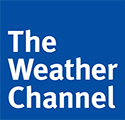

In [105]:
text

Notice how much more difficult (terrible) the formatting is. This is often intentional. Companies may not want their data to be easy to access,...

    
       table-shadow sticky"></div></th><th class="description hidden-cell-sm" id="description" className="description hidden-cell-sm">Description</th><th class="temp" id="temp" className="temp">Temp</th><th class="feels" id="feels" className="feels">Feels</th><th class="precip" id="precip" className="precip">Precip</th><th class="humidity" id="humidity" className="humidity">Humidity</th><th class="wind" id="wind" className="wind">Wind</th></tr></thead><tbody><tr class="clickable closed" className="clickable closed"><td class="twc-sticky-col cell-hide"><div class="twc-table-shadow sticky" className="twc-table-shadow sticky"></div></td><td class="twc-sticky-col  " headers="time" data-track-string="ls_hourly_ls_hourly_toggle" className="twc-sticky-col  "><div><div class="hourly-time"><span class="dsx-date">13:15</span><icon class="icon icon-svg icon-svg-light icon-scattered-showers icon-11" className="icon icon-svg icon-svg-light icon-scattered-showers icon-11"><svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" viewBox="0 0 200 200" class="svg-scattered-showers"><use class="svg-cloud" xlink:href="#svg-symbol-cloud" transform="translate(0 -41)" stroke-width="5.7"/><use class="svg-drop" xlink:href="#svg-symbol-drop" transform="translate(16)"/><use class="svg-drop" xlink:href="#svg-symbol-drop" transform="matrix(1.7 0 0 2 -13 -121)"/></svg></icon><div class="twc-table-shadow sticky" className="twc-table-shadow sticky"></div></div><div class="hourly-date">Wed</div></div></td><td class="hidden-cell-sm description" headers="description" data-track-string="ls_hourly_ls_hourly_toggle" className="hidden-cell-sm description"><span>Light Rain</span></td><td class="temp" headers="temp" data-track-string="ls_hourly_ls_hourly_toggle" 

** The point here is that although it is possible to scrape websites, it is, in practice, almost never easy !! **

# Exercise 3: 

## If you're doing really well, try this exercise. It will not be easy.

If you get stuck, that's totally fine. I'm just trying to expose you to some stuff that you *could* do if you had the time. Nobody would expect you to be able to do this in the span of an hour

## Scraping Cryptocurrency Data

In [11]:
URL = "https://coinmarketcap.com"
wb.open(URL)   # returns True if it succeeds

True

In [98]:
response = requests.get(URL)
response 
# response should be 200 if it works
# Fun Fact: if your error code is between 400-499, then it's a mistake on your side. (i.e. "404 Not Found")
# if the error code is between 500-599, then it's a mistake on the server side (i.e. "503 Service not Available")

<Response [200]>

In [99]:
text = response.text     # here's the HTML behind the website

In [100]:
text

'<!doctype html>\n<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!-->\n<html lang="en"> <!--<![endif]-->\n<head>\n<meta charset="utf-8">\n<meta http-equiv="x-ua-compatible" content="ie=edge"><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={xpid:"VQ4BV1dWDxABVFdQAQIEX1M="};window.NREUM||(NREUM={}),__nr_require=function(t,n,e){function r(e){if(!n[e]){var o=n[e]={exports:{}};t[e][0].call(o.exports,function(n){var o=t[e][1][n];return r(o||n)},o,o.exports)}return n[e].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<e.length;o++)r(e[o]);return r}({1:[function(t,n,e){function r(t){try{s.console&&console.log(t)}catch(n){}}var o,i=t("ee"),a=t(16),s={};try{o=localStorage.getItem("__nr_flags").split(","),console&&"function"==typeof console.log&&(s.console=!0,o.

In [101]:
soup = bs4.BeautifulSoup(response.text)

/Applications/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Applications/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [102]:
for item in soup.find_all(class_ = 'price'):
    print(item)

<a class="price" data-btc="1.0" data-usd="6520.45731449" href="/currencies/bitcoin/#markets">$6520.46</a>
<a class="price" data-btc="0.0337148160829" data-usd="219.383667163" href="/currencies/ethereum/#markets">$219.38</a>
<a class="price" data-btc="8.20038483163e-05" data-usd="0.536534329625" href="/currencies/ripple/#markets">$0.536534</a>
<a class="price" data-btc="0.0971437582372" data-usd="632.118350333" href="/currencies/bitcoin-cash/#markets">$632.12</a>
<a class="price" data-btc="0.000872547226377" data-usd="5.67769997098" href="/currencies/eos/#markets">$5.68</a>
<a class="price" data-btc="3.95558972703e-05" data-usd="0.25880610801" href="/currencies/stellar/#markets">$0.258806</a>
<a class="price" data-btc="0.00841921424334" data-usd="55.0851888389" href="/currencies/litecoin/#markets">$55.09</a>
<a class="price" data-btc="1.21618265088e-05" data-usd="0.079572331871" href="/currencies/cardano/#markets">$0.079572</a>
<a class="price" data-btc="0.0169253131299" data-usd="110.7

In [103]:
for item in soup.find_all(class_ = 'price'):
    print(item['href'].split(sep = '/')[2].ljust(40, ' '), end = '')
    print(item['data-usd'])

bitcoin                                 6520.45731449
ethereum                                219.383667163
ripple                                  0.536534329625
bitcoin-cash                            632.118350333
eos                                     5.67769997098
stellar                                 0.25880610801
litecoin                                55.0851888389
cardano                                 0.079572331871
monero                                  110.738846046
tether                                  0.992742343268
tron                                    0.0238675279957
dash                                    166.479854722
iota                                    0.503505596441
binance-coin                            9.78937380328
neo                                     16.8257867546
ethereum-classic                        9.66645261386
nem                                     0.0967417748674
tezos                                   1.34400851396
zcash               

In [126]:
# And here's some code to get just the first 5 coins


numCoins = 5
coinNames = []
prices = []
for item in soup.find_all(class_ = 'price')[:numCoins]:
    coinName = item['href'].split(sep = '/')[2]
    coinNames.append(coinName)
    prices.append(float(item['data-usd']))

In [131]:
print(*list(zip(coinNames, prices)), sep = '\n') 

('bitcoin', 6439.78227986)
('ethereum', 212.486941027)
('ripple', 0.371406552673)
('bitcoin-cash', 436.987918333)
('eos', 5.33055412735)
